# PHY480/905 Semester Project 

#### PHY 480/905 Semester Project
### &#9989; Dhiti Doddamreddy
#### &#9989; Last Updated on 4/20/24

# Comparative Analysis of Numerical Methods for Solving Electrostatic Potentials in  a Rectangular Pipe

## Part 1: Introduction 

This project explores the numerical analysis of electrostatic potentials within a rectangular pipe, a scenario that represents a real-world application in physics and engineering. This analysis focus on implementing and comparing three iterative numerical methods: Jacobi, Gauss-Seidel, and Successive Overrelaxation (SOR), each offering different approaches to approximating solutions that determine electrostatic occurences. By evaluating the convergence rates, number of iterations, and time it takes to calculate, this project aims to highlight their respective strengths and limitations in solving electrostatic potential problems. Through this analysis, we can provide insights into selecting the most appropriate method for specific applications. 


## Part 2: Methodology

Let's learn about these three methods and how they work. The first method is the Jacobi Method.

The __Jacobi Method__ is an iterative algorithm used for solving linear systems of equations, especially discretizing differential equations. The Jacobi method can be applied to the discretized Laplace or Poisson equation [1].

The Jacobi method considers a system of linear equations represented in matrix form as $Ax = b$ where:

- $A$ is a square matric of coefficients
- $x$ is a column vector of unknown variables
- $b$ is a column vector of constants

The method iteratively updates each element of $x$ based on the formula derived from $Ax = b$, rearranged to isolate the diagonal element of $A$. This gives us the equation below:

$$
x_i^{(k+1)}=\frac{b_i-\sum_{j=1, j\ne i}^{n}a_{ij}x_j^{(k)}}{a_{ii}}
$$
[12]
- $x_i^{(k+1)}$ is the value of the $i$-th variable at the $(k + 1)$-th iteraction
- $a_{ii}$ is the $i$-th diagonal element of $A$
- $b_i$ is the $i$-th element of $b$
- The sum is over $j$, excluding $i$, using values of x from the previous iteration $k$.

In the context of the project, each point's potential is updated based on the average of its neighbors' potentials following the formula above into the potential distribution converges to a stable orientation.

The __Gauss-Seidel's Method__ is an improved version of the Jacobi method, where it uses the latest updated values to accelerate convergence.

It follows the same system of linear equations in matrix form, $Ax = b$, where the variables are defined to be the same as mentioned in the Jacobi Method. 

In each iteration, the Gauss-Seidel method updates each component of $x$ sequentially from the first to the last. The formula used to update the $i$-th component is below:

$$
x^{(k+1)}_i = \frac{1}{a_{ii}} \left(b_i - \sum_{j < i}a_{ij}x^{(k+1)}_j - \sum_{j > i}a_{ij}x^{(k)}_j \right),\quad i\in\{1,2,\ldots,n\}.
$$[12]
-  $x_i^{(k+1)}$ is the value of the $i$-th variable at the $(k + 1)$-th iteraction
- $a_{ii}$ is the $i$-th diagonal element of $A$
- $b_i$ is the $i$-th element of $b$
- The first sum runs over all previously updated elements in the current iteration $(x_j^{k+1} for j < i)$ using the most recent values.
- The second sum runs over all future elemetns in the curremt iteration $(x_j^{k} for j > i)$, using values from the previous iteration.

The __Successive Overrelaxation Method (SOR)__ enhances the Gauss-Seidel method by introducing a relaxation factor. This method is effective for systems where the Gauss-Seidel method converges slowly. 

Once again let's follow the same linear equation represented as $Ax = b$, where all the variables represent the same things as in the Jacobi and Gauss-Seidel method.

The SOR method updates each component of x by using the most recent value but also applying a relaxation factor $(\omega)$ to the update value. This formula is below:


$$
x_i^{(\text{new})} = (1-\omega)x_i^{(\text{old})} + \frac{\omega}{a_{ii}}\left(b_i - \sum_{j=1}^{i-1}a_{ij}x_j^{(\text{new})} - \sum_{j=i+1}^{n}a_{ij}x_j^{(\text{old})}\right)
$$

-  $x_i^{(k+1)}$ is the value of the $i$-th variable at the $(k + 1)$-th iteration
- $a_{ii}$ is the $i$-th diagonal element of $A$
- $b_i$ is the $i$-th element of $b$
- $\omega$ is the relaxation factor, with typical values between 1 and 2. The choice of $\omega$ significantly impacts the convergence rate, where $\omega$ > 1 attempts to over correct the update step. This is why it is called overrelaxation [9].


### Part 2.1: Setting Up Problem
Let's first define the geometry within the rectangular pipe we are looking at.

Let's consider a rectangular pipe lying in the $xy$-plane, with lenght $L$ along the $x$-axis and height $H$ along the $y$-axis. The corners of our rectangular pipe, according to our axis, are located at coordinates: $(0,0)$, $(L,0)$, $(L,H)$, and $(0,H)$. 



### Part 2.1.1: Defining the Problem Parameters in Code

In [1]:
import numpy as np

#Parameters
L = 1.0  # length of the pipe in the x-direction (meters)
H = 1.0  # height of the pipe in the y-direction (meters)

#Size of Mesh
Nx = 50  # number of grid points in the x-direction
Ny = 50  # number of grid points in the y-direction
dx = L / (Nx - 1)  # distance between grid points in the x-direction
dy = H / (Ny - 1)  # distance between grid points in the y-direction

### Part 2.1.2: Defining the Boundary Conditions
We must specificy the boundary conditions. To begin let's assuming these conditions:

Three of the sides are grounded, which means the potential $\Phi$ is set to zero on 3 sides of pipe representing grounded boundaries. This is how it would look mathematically:

- $\Phi(0,y) = 0$ for the left side
- $\Phi(L,y) = 0$ for the right side
- $\Phi(x,0) = 0$ for the bottom side

For the fourth side, the top side of the pipe, has a specific potential of $V_0$. This then means $\Phi(x,H) = V_0$. For the first part of the analysis we are keeping $V_0$ constant at 1.

In [2]:
#Initializing potential array
potential = np.zeros((Ny, Nx))

#Boundary conditions
V_0 = 1

#Applying boundary conditions
potential[:, 0] = 0  # Left side
potential[:, -1] = 0  # Right side
potential[0, :] = 0  # Bottom side
potential[-1, :] = V_0  # Top side

Now that we have set up the problem and parameters we can start implementing the different numerical methods to see how the outcomes.

### Part 2.2: Implementing Jacobi Method

Jacobi Method: Converged in 5498 iterations, taking 10.7697 seconds.


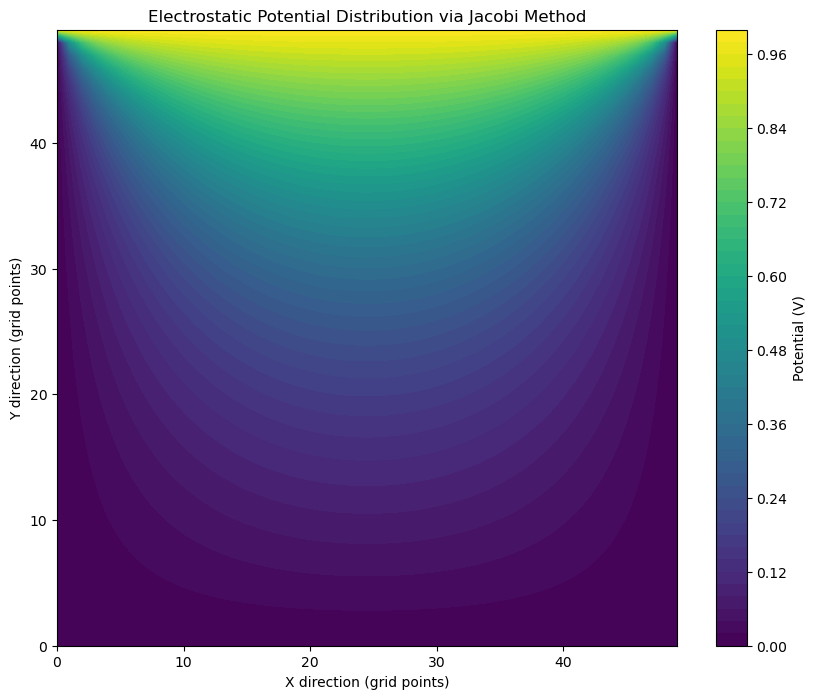

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time

def calculate_error(old_potential, new_potential):
    """
    Calculate the total relative error between two potential distributions.

    Parameters:
    - old_potential (np.ndarray): The potential distribution from the previous iteration.
    - new_potential (np.ndarray): The updated potential distribution from the current iteration.

    Returns:
    - float: The sum of the absolute relative errors across all points in the grid.
    """
    errs = np.abs((new_potential - old_potential) / np.where(new_potential != 0, new_potential, 1))
    return np.sum(errs)

def jacobi(potential, kmax=10000, tol=1e-4):
    """
    Solve the electrostatic potential using the Jacobi iterative method.

    Parameters:
    - potential (np.ndarray): The initial grid of potential values, including boundary conditions.
    - kmax (int): The maximum number of iterations to perform.
    - tol (float): The tolerance for convergence, based on the total error.

    Returns:
    - np.ndarray: The converged potential distribution, or None if convergence was not achieved.
    - int: The number of iterations performed.
    - float: The execution time in seconds.
    """
    start_time = time.time()  # Start the timer
    Ny, Nx = potential.shape
    for k in range(kmax):
        old_potential = np.copy(potential)
        for i in range(1, Ny - 1):
            for j in range(1, Nx - 1):
                potential[i, j] = 0.25 * (old_potential[i+1, j] + old_potential[i-1, j] +
                                          old_potential[i, j+1] + old_potential[i, j-1])
        
        err = calculate_error(old_potential[1:-1, 1:-1], potential[1:-1, 1:-1])
        if err < tol:
            j_time = time.time() - start_time
            return potential, k + 1, j_time
    execution_time = time.time() - start_time  # Time if not converged within kmax
    return None, kmax, j_time

# Problem setup
L, H = 1.0, 1.0  # Pipe dimensions
Nx, Ny = 50, 50  # Grid size
V_0 = 1  # Boundary condition at the top

# Initialize potential array and set boundary conditions
potential = np.zeros((Ny, Nx))
potential[:, 0] = 0  # Left side
potential[:, -1] = 0  # Right side
potential[0, :] = 0  # Bottom side
potential[-1, :] = V_0  # Top side

solved_potential, j_iterations, j_time = jacobi(potential)
print(f"Jacobi Method: Converged in {j_iterations} iterations, taking {j_time:.4f} seconds.")

# Visualization created only if convergence occurred
if solved_potential is not None:
    plt.figure(figsize=(10, 8))
    plt.contourf(solved_potential, 50, cmap='viridis')
    plt.colorbar(label='Potential (V)')
    plt.title('Electrostatic Potential Distribution via Jacobi Method')
    plt.xlabel('X direction (grid points)')
    plt.ylabel('Y direction (grid points)')
    plt.show()


We are expected to see the same graphical outcome for all the methods as they are finding the same electrostatic potential in the pipe but we will find variation in the interation times.

### Part 2.3: Implementing Gauss-Seidel Method

The overall code will look the same for the Gauss-Seidel Method as it is for the Jacobi method. In the Jacobi method, the calculations of the new potential value at each grid point uses only the old values from the previous iteration. The Gauss-Seidel method updates the potential values in place and immediately uses the updated values for calculations in the same iteration.

Gauss-Seidel Method: Converged in 2935 iterations, taking 6.0074 seconds.


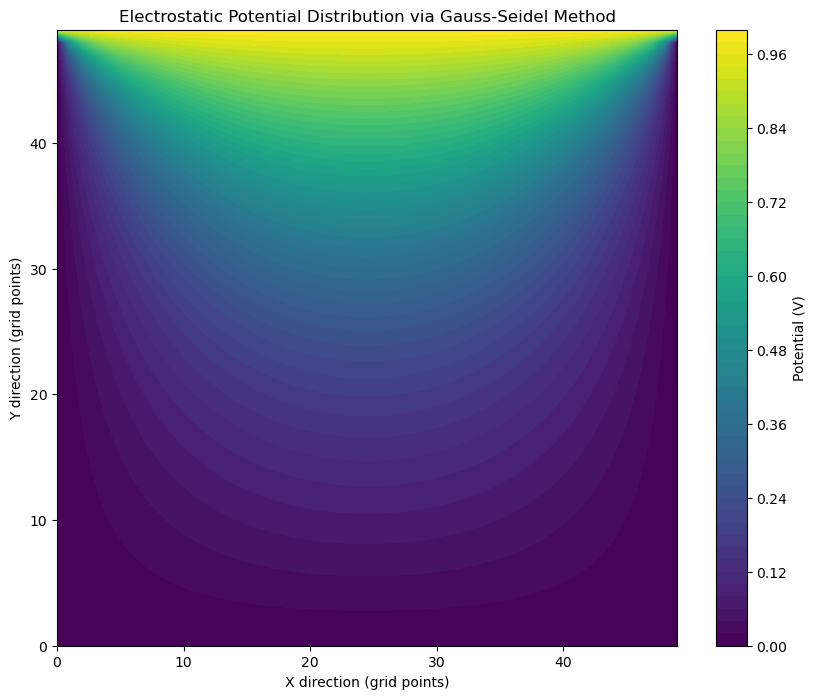

In [4]:
import numpy as np
import time
import matplotlib.pyplot as plt

def calculate_error(old_potential, new_potential):
    """
    Calculate the total relative error between two potential distributions.

    Parameters:
    - old_potential (np.ndarray): The potential distribution from the previous iteration.
    - new_potential (np.ndarray): The updated potential distribution from the current iteration.

    Returns:
    - float: The sum of the absolute relative errors across all points in the grid.
    """
    errs = np.abs((new_potential - old_potential) / np.where(new_potential != 0, new_potential, 1))
    return np.sum(errs)

def gauss_seidel(potential, kmax=10000, tol=1e-4):
    """
    Solve the electrostatic potential using the Gauss-Seidel iterative method.

    Parameters:
    - potential (np.ndarray): The initial grid of potential values, including boundary conditions.
    - kmax (int): The maximum number of iterations to perform.
    - tol (float): The tolerance for convergence, based on the total error.

    Returns:
    - np.ndarray: The converged potential distribution, or None if convergence was not achieved.
    - int: The number of iterations performed.
    - float: The execution time in seconds.
    """
    start_time = time.time()
    Ny, Nx = potential.shape
    for k in range(kmax):
        old_potential = np.copy(potential)
        for i in range(1, Ny - 1):
            for j in range(1, Nx - 1):
                potential[i, j] = 0.25 * (potential[i+1, j] + potential[i-1, j] + 
                                          potential[i, j+1] + potential[i, j-1])
        
        err = calculate_error(old_potential[1:-1, 1:-1], potential[1:-1, 1:-1])
        if err < tol:
            g_time = time.time() - start_time
            return potential, k + 1, g_time
    g_time = time.time() - start_time
    return None, kmax, g_time

# Problem setup
L, H = 1.0, 1.0  # Pipe dimensions
Nx, Ny = 50, 50  # Grid size
V_0 = 1  # Boundary condition at the top

# Initialize potential array and set boundary conditions
potential = np.zeros((Ny, Nx))
potential[:, 0] = 0  # Left side
potential[:, -1] = 0  # Right side
potential[0, :] = 0  # Bottom side
potential[-1, :] = V_0  # Top side


solved_potential, g_iterations, g_time = gauss_seidel(potential)
print(f"Gauss-Seidel Method: Converged in {g_iterations} iterations, taking {g_time:.4f} seconds.")

# Visualization
if solved_potential is not None:
    plt.figure(figsize=(10, 8))
    plt.contourf(solved_potential, 50, cmap='viridis')
    plt.colorbar(label='Potential (V)')
    plt.title('Electrostatic Potential Distribution via Gauss-Seidel Method')
    plt.xlabel('X direction (grid points)')
    plt.ylabel('Y direction (grid points)')
    plt.show()


Now lets implement the last method and see how the code differs for this method in comparison to the Jacobi and Gauss-Seidel method.

### Part 2.4: Implementing Successive Overrelaxation Method 

Once again the overall code between the three methods will look the same, however the key difference is the inclusion of the relaxation factor $\omega$ in this code. The SOR uses the relaxation factor and implements it in the update formula. The factor is used to scale the difference between the current value and the newly calculated one.

SOR Method (ω=1.5): Converged in 1072 iterations, taking 3.4302 seconds.


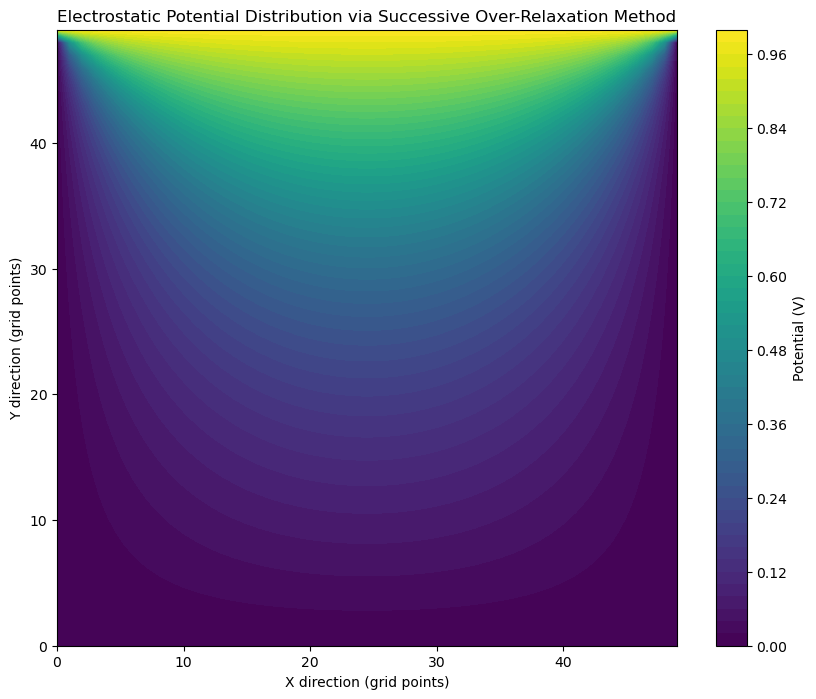

In [5]:
import numpy as np
import time
import matplotlib.pyplot as plt

def calculate_error(old_potential, new_potential):
    """
    Calculate the total relative error between two potential distributions.
    
    Parameters:
    - old_potential (np.ndarray): The potential distribution from the previous iteration.
    - new_potential (np.ndarray): The updated potential distribution from the current iteration.
    
    Returns:
    - float: The sum of the absolute relative errors across all points in the grid.
    """
    errs = np.abs((new_potential - old_potential) / np.where(new_potential != 0, new_potential, 1))
    return np.sum(errs)

def SOR(potential, omega, kmax=10000, tol=1e-4):
    """
    Solve the electrostatic potential using the Successive Overrelaxation (SOR) method.
    
    Parameters:
    - potential (np.ndarray): The initial grid of potential values, including boundary conditions.
    - omega (float): The relaxation factor used to accelerate convergence.
    - kmax (int): The maximum number of iterations to perform.
    - tol (float): The tolerance for convergence, based on the total error.
    
    Returns:
    - np.ndarray: The converged potential distribution, or None if convergence was not achieved.
    - int: The number of iterations performed.
    - float: The execution time in seconds.
    """
    start_time = time.time()
    Ny, Nx = potential.shape
    for k in range(kmax):
        old_potential = np.copy(potential)
        for i in range(1, Ny - 1):
            for j in range(1, Nx - 1):
                new_value = 0.25 * (potential[i+1, j] + potential[i-1, j] +
                                    potential[i, j+1] + potential[i, j-1])
                potential[i, j] = potential[i, j] + omega * (new_value - potential[i, j])
        
        err = calculate_error(old_potential[1:-1, 1:-1], potential[1:-1, 1:-1])
        if err < tol:
            s_time = time.time() - start_time
            return potential, k + 1, s_time
    s_time = time.time() - start_time
    return None, kmax, s_time

# Problem setup
L, H = 1.0, 1.0  # Pipe dimensions
Nx, Ny = 50, 50  # Grid size
V_0 = 1  # Boundary condition at the top

# Initialize potential array and set boundary conditions
potential = np.zeros((Ny, Nx))
potential[:, 0] = 0  # Left side
potential[:, -1] = 0  # Right side
potential[0, :] = 0  # Bottom side
potential[-1, :] = V_0  # Top side



omega = 1.5  # Relaxation factor
solved_potential, s_iterations, s_time = SOR(potential, omega)
print(f"SOR Method (ω={omega}): Converged in {s_iterations} iterations, taking {s_time:.4f} seconds.")

# Visualization
if solved_potential is not None:
    plt.figure(figsize=(10, 8))
    plt.contourf(solved_potential, 50, cmap='viridis')
    plt.colorbar(label='Potential (V)')
    plt.title('Electrostatic Potential Distribution via Successive Over-Relaxation Method')
    plt.xlabel('X direction (grid points)')
    plt.ylabel('Y direction (grid points)')
    plt.show()


### Part 2.5: Comparing the Three Methods

To compare the three methods we can look at the execution time as well as the number of iterations it took to converge to return the final potential distribution inside the rectangular pipe.

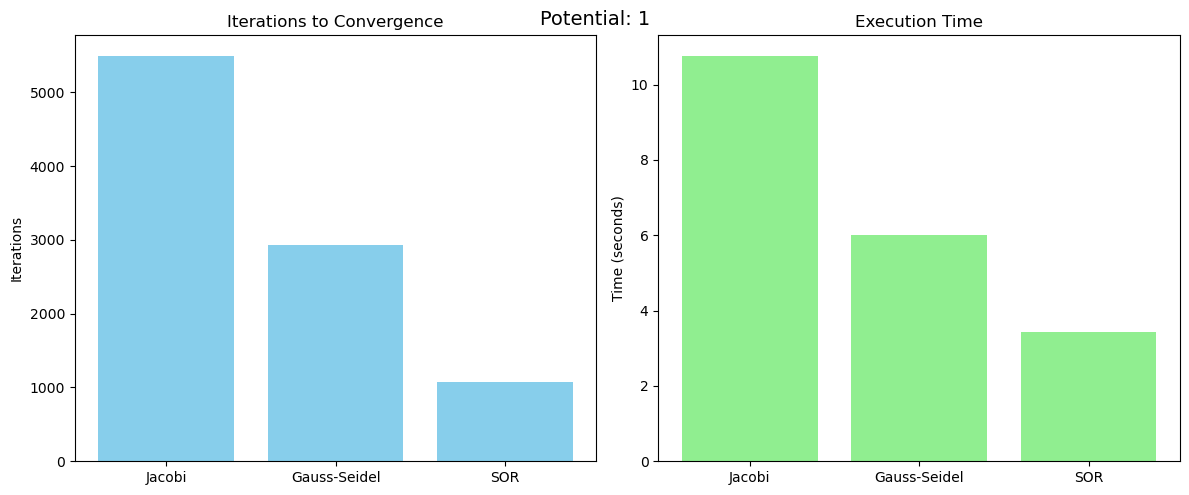

In [6]:
methods = ['Jacobi', 'Gauss-Seidel', 'SOR']
iterations = [j_iterations, g_iterations, s_iterations] 
execution_times = [j_time, g_time, s_time] 

plt.figure(figsize=(12, 5))
# Plotting iterations
plt.subplot(1, 2, 1)
plt.bar(methods, iterations, color='skyblue')
plt.title('Iterations to Convergence')
plt.ylabel('Iterations')

# Plotting execution time
plt.subplot(1, 2, 2)
plt.bar(methods, execution_times, color='lightgreen')
plt.title('Execution Time')
plt.ylabel('Time (seconds)')

plt.tight_layout()
fig = plt.gcf()
fig.suptitle('Potential: 1', fontsize=14) 
plt.show()


There is a clear difference between the number of iterations each method needs to converge as well as the execution time each method takes. Based on when $V_0$ = 1, the SOR method uses less iterations to converge and takes less time to execute.

### Part 2.6: Not A Constant Potential

To further evaluate the methods, I want to explore how variations in the potential affect the execution time and the number of iterations required for convergence. Instead of making it constant, I used np.linspace to have a varying potential from 0 to $2\pi$.The base parameters such as the length and height of the rectangular pipe will remain the same. 

In [7]:
#Parameters
L = 1.0  # length of the pipe in the x-direction (meters)
H = 1.0  # height of the pipe in the y-direction (meters)

#Size of Mesh
Nx = 50  # number of grid points in the x-direction
Ny = 50  # number of grid points in the y-direction
dx = L / (Nx - 1)  # distance between grid points in the x-direction
dy = H / (Ny - 1)  # distance between grid points in the y-direction

In [8]:
#Initializing potential array
potential = np.zeros((Ny, Nx))

#Boundary conditions
V_0 = np.linspace(0,2*np.pi)

#Applying boundary contitions
potential[:, 0] = 0  # Left side
potential[:, -1] = 0  # Right side
potential[0, :] = 0  # Bottom side
potential[-1, :] = V_0  # Top side

### Part 2.7: Jacobi Method with New Potential

Let's rerun the Jacobi Method but with the new updating potential.

Jacobi Method: Converged in 5506 iterations, taking 10.9876 seconds.


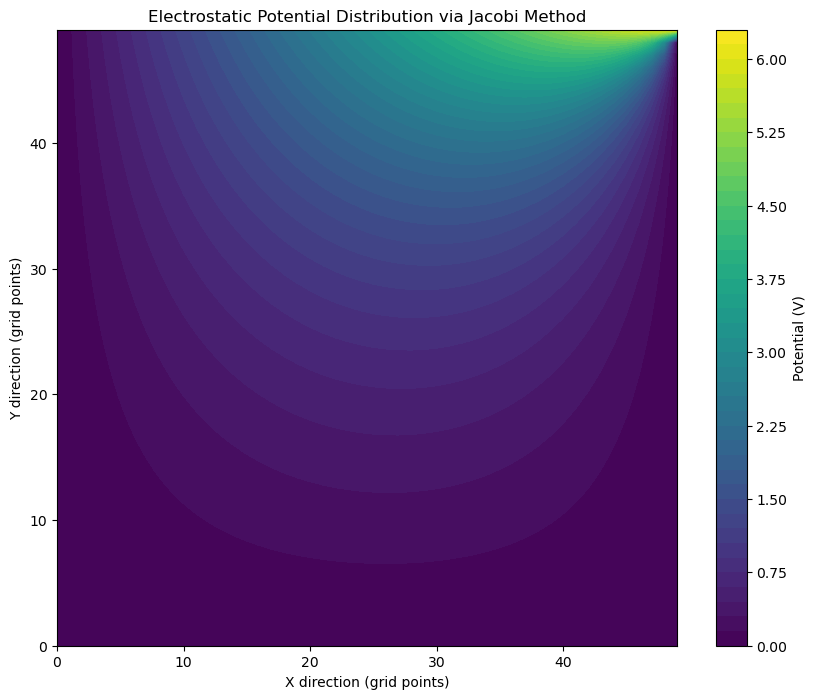

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import time

def calculate_error(old_potential, new_potential):
    """
    Calculate the total relative error between two potential distributions.

    Parameters:
    - old_potential (np.ndarray): The potential distribution from the previous iteration.
    - new_potential (np.ndarray): The updated potential distribution from the current iteration.

    Returns:
    - float: The sum of the absolute relative errors across all points in the grid.
    """
    errs = np.abs((new_potential - old_potential) / np.where(new_potential != 0, new_potential, 1))
    return np.sum(errs)

def jacobi(potential, kmax=10000, tol=1e-4):
    """
    Solve the electrostatic potential using the Jacobi iterative method.

    Parameters:
    - potential (np.ndarray): The initial grid of potential values, including boundary conditions.
    - kmax (int): The maximum number of iterations to perform.
    - tol (float): The tolerance for convergence, based on the total error.

    Returns:
    - np.ndarray: The converged potential distribution, or None if convergence was not achieved.
    - int: The number of iterations performed.
    - float: The execution time in seconds.
    """
    start_time = time.time()  # Start the timer
    Ny, Nx = potential.shape
    for k in range(kmax):
        old_potential = np.copy(potential)
        for i in range(1, Ny - 1):
            for j in range(1, Nx - 1):
                potential[i, j] = 0.25 * (old_potential[i+1, j] + old_potential[i-1, j] +
                                          old_potential[i, j+1] + old_potential[i, j-1])
        
        err = calculate_error(old_potential[1:-1, 1:-1], potential[1:-1, 1:-1])
        if err < tol:
            j_time_1 = time.time() - start_time
            return potential, k + 1, j_time_1
    execution_time = time.time() - start_time  # Time if not converged within kmax
    return None, kmax, j_time_1

# Problem setup
L, H = 1.0, 1.0  # Pipe dimensions
Nx, Ny = 50, 50  # Grid size
V_0 = np.linspace(0,2*np.pi)  # Boundary condition at the top

# Initialize potential array and set boundary conditions
potential = np.zeros((Ny, Nx))
potential[:, 0] = 0  # Left side
potential[:, -1] = 0  # Right side
potential[0, :] = 0  # Bottom side
potential[-1, :] = V_0  # Top side

solved_potential, j_iterations_1, j_time_1 = jacobi(potential)
print(f"Jacobi Method: Converged in {j_iterations_1} iterations, taking {j_time_1:.4f} seconds.")

# Visualization 
if solved_potential is not None:
    plt.figure(figsize=(10, 8))
    plt.contourf(solved_potential, 50, cmap='viridis')
    plt.colorbar(label='Potential (V)')
    plt.title('Electrostatic Potential Distribution via Jacobi Method')
    plt.xlabel('X direction (grid points)')
    plt.ylabel('Y direction (grid points)')
    plt.show()


### Part 2.8: Gauss-Seidel Method with New Potential

Gauss-Seidel Method: Converged in 2942 iterations, taking 5.7594 seconds.


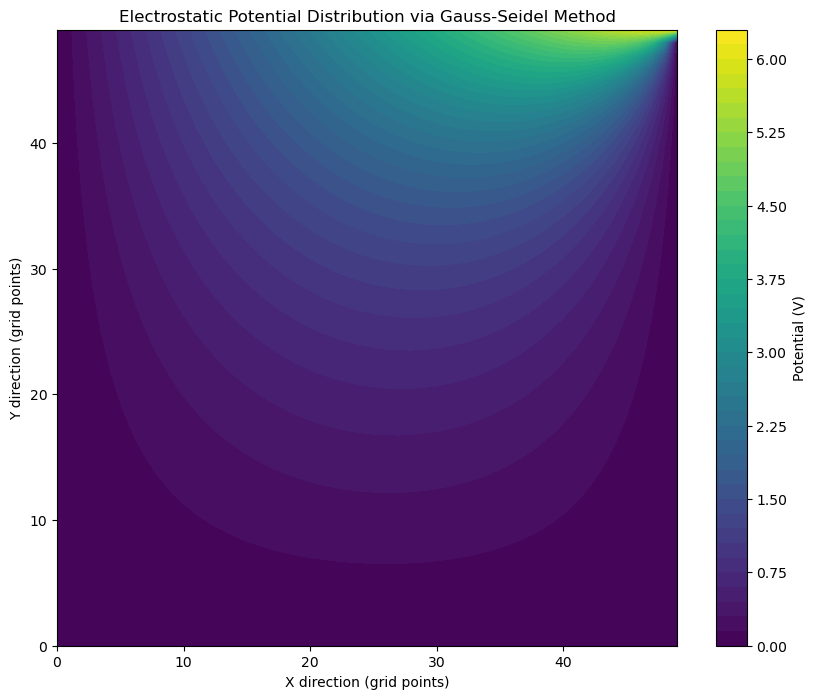

In [10]:
import numpy as np
import time
import matplotlib.pyplot as plt

def calculate_error(old_potential, new_potential):
    """
    Calculate the total relative error between two potential distributions.

    Parameters:
    - old_potential (np.ndarray): The potential distribution from the previous iteration.
    - new_potential (np.ndarray): The updated potential distribution from the current iteration.

    Returns:
    - float: The sum of the absolute relative errors across all points in the grid.
    """
    errs = np.abs((new_potential - old_potential) / np.where(new_potential != 0, new_potential, 1))
    return np.sum(errs)

def gauss_seidel(potential, kmax=10000, tol=1e-4):
    """
    Solve the electrostatic potential using the Gauss-Seidel iterative method.

    Parameters:
    - potential (np.ndarray): The initial grid of potential values, including boundary conditions.
    - kmax (int): The maximum number of iterations to perform.
    - tol (float): The tolerance for convergence, based on the total error.

    Returns:
    - np.ndarray: The converged potential distribution, or None if convergence was not achieved.
    - int: The number of iterations performed.
    - float: The execution time in seconds.
    """
    start_time = time.time()
    Ny, Nx = potential.shape
    for k in range(kmax):
        old_potential = np.copy(potential)
        for i in range(1, Ny - 1):
            for j in range(1, Nx - 1):
                potential[i, j] = 0.25 * (potential[i+1, j] + potential[i-1, j] + 
                                          potential[i, j+1] + potential[i, j-1])
        
        err = calculate_error(old_potential[1:-1, 1:-1], potential[1:-1, 1:-1])
        if err < tol:
            g_time_1 = time.time() - start_time
            return potential, k + 1, g_time_1
    g_time_1 = time.time() - start_time
    return None, kmax, g_time_1

# Problem setup
L, H = 1.0, 1.0  # Pipe dimensions
Nx, Ny = 50, 50  # Grid size
V_0 = np.linspace(0,2*np.pi)  # Boundary condition at the top

# Initialize potential array and set boundary conditions
potential = np.zeros((Ny, Nx))
potential[:, 0] = 0  # Left side
potential[:, -1] = 0  # Right side
potential[0, :] = 0  # Bottom side
potential[-1, :] = V_0  # Top side

solved_potential, g_iterations_1, g_time_1 = gauss_seidel(potential)
print(f"Gauss-Seidel Method: Converged in {g_iterations_1} iterations, taking {g_time_1:.4f} seconds.")

# Visualization
if solved_potential is not None:
    plt.figure(figsize=(10, 8))
    plt.contourf(solved_potential, 50, cmap='viridis')
    plt.colorbar(label='Potential (V)')
    plt.title('Electrostatic Potential Distribution via Gauss-Seidel Method')
    plt.xlabel('X direction (grid points)')
    plt.ylabel('Y direction (grid points)')
    plt.show()


### Part 2.9: Successive Overrelaxation Method with New Potential

SOR Method (ω=1.5): Converged in 1077 iterations, taking 3.3929 seconds.


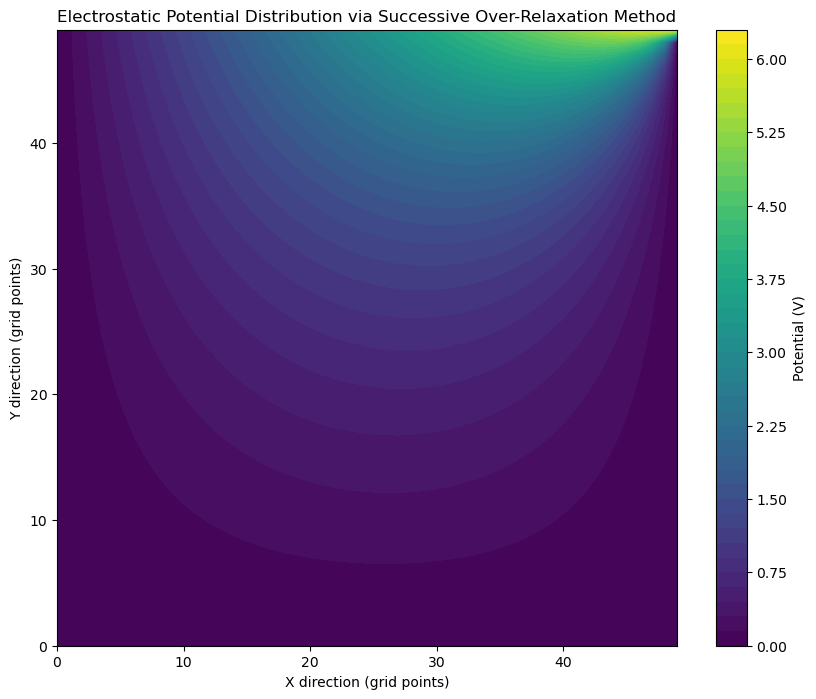

In [11]:
import numpy as np
import time
import matplotlib.pyplot as plt

def calculate_error(old_potential, new_potential):
    """
    Calculate the total relative error between two potential distributions.
    
    Parameters:
    - old_potential (np.ndarray): The potential distribution from the previous iteration.
    - new_potential (np.ndarray): The updated potential distribution from the current iteration.
    
    Returns:
    - float: The sum of the absolute relative errors across all points in the grid.
    """
    errs = np.abs((new_potential - old_potential) / np.where(new_potential != 0, new_potential, 1))
    return np.sum(errs)

def SOR(potential, omega, kmax=10000, tol=1e-4):
    """
    Solve the electrostatic potential using the Successive Overrelaxation (SOR) method.
    
    Parameters:
    - potential (np.ndarray): The initial grid of potential values, including boundary conditions.
    - omega (float): The relaxation factor used to accelerate convergence.
    - kmax (int): The maximum number of iterations to perform.
    - tol (float): The tolerance for convergence, based on the total error.
    
    Returns:
    - np.ndarray: The converged potential distribution, or None if convergence was not achieved.
    - int: The number of iterations performed.
    - float: The execution time in seconds.
    """
    start_time = time.time()
    Ny, Nx = potential.shape
    for k in range(kmax):
        old_potential = np.copy(potential)
        for i in range(1, Ny - 1):
            for j in range(1, Nx - 1):
                new_value = 0.25 * (potential[i+1, j] + potential[i-1, j] +
                                    potential[i, j+1] + potential[i, j-1])
                potential[i, j] = potential[i, j] + omega * (new_value - potential[i, j])
        
        err = calculate_error(old_potential[1:-1, 1:-1], potential[1:-1, 1:-1])
        if err < tol:
            s_time_1 = time.time() - start_time
            return potential, k + 1, s_time_1
    s_time_1 = time.time() - start_time
    return None, kmax, s_time_1

# Problem setup
L, H = 1.0, 1.0  # Pipe dimensions
Nx, Ny = 50, 50  # Grid size
V_0 = np.linspace(0,2*np.pi)  # Boundary condition at the top

# Initialize potential array and set boundary conditions
potential = np.zeros((Ny, Nx))
potential[:, 0] = 0  # Left side
potential[:, -1] = 0  # Right side
potential[0, :] = 0  # Bottom side
potential[-1, :] = V_0  # Top side

omega = 1.5  # Relaxation factor
solved_potential, s_iterations_1, s_time_1 = SOR(potential, omega)
print(f"SOR Method (ω={omega}): Converged in {s_iterations_1} iterations, taking {s_time_1:.4f} seconds.")

# Visualization
if solved_potential is not None:
    plt.figure(figsize=(10, 8))
    plt.contourf(solved_potential, 50, cmap='viridis')
    plt.colorbar(label='Potential (V)')
    plt.title('Electrostatic Potential Distribution via Successive Over-Relaxation Method')
    plt.xlabel('X direction (grid points)')
    plt.ylabel('Y direction (grid points)')
    plt.show()


### Part 2.10: Comparing the Three Methods with the New Potential

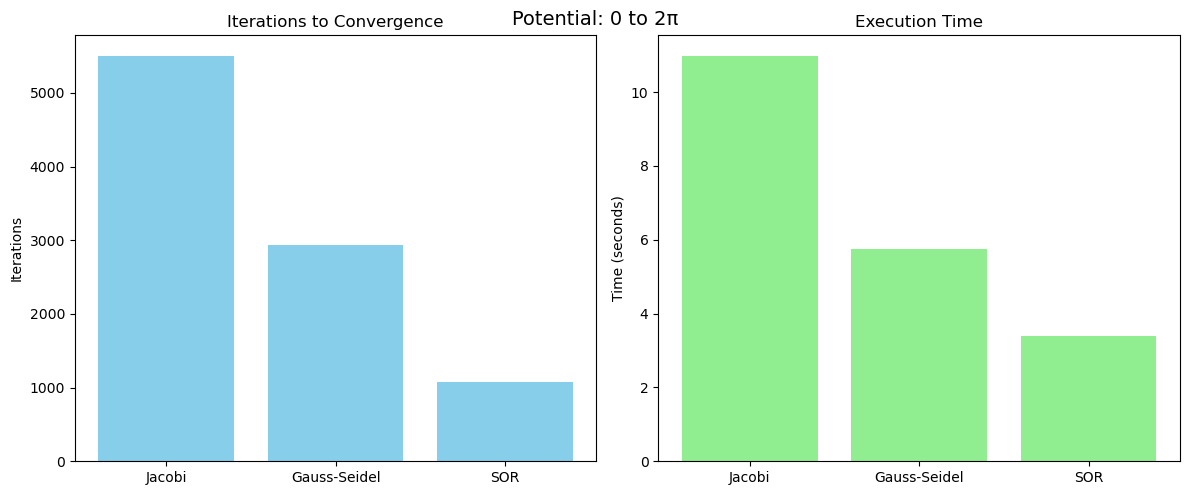

In [12]:
methods = ['Jacobi', 'Gauss-Seidel', 'SOR']
iterations = [j_iterations_1, g_iterations_1, s_iterations_1]  
execution_times = [j_time_1, g_time_1, s_time_1]

plt.figure(figsize=(12, 5))

# Plotting iterations
plt.subplot(1, 2, 1)
plt.bar(methods, iterations, color='skyblue')
plt.title('Iterations to Convergence')
plt.ylabel('Iterations')

# Plotting execution time
plt.subplot(1, 2, 2)
plt.bar(methods, execution_times, color='lightgreen')
plt.title('Execution Time')
plt.ylabel('Time (seconds)')

plt.tight_layout()
fig = plt.gcf()
fig.suptitle('Potential: 0 to 2π', fontsize=14) 
plt.show()

As expected the Successive Overrelaxation Method has the lowest execution time as well as the least number of iterations taken to converge. 

## Part 3: Results and Discussion

Due to redundancy sake I didn't include all the electrostatic potential graphs that were used to this section, otherwise the notebook would be very long. However, those plots were used in the presentation to show that the output regardless of the method was the same. It was also a way of checking that all three methods worked as they produced the same outputs. I decided to include the comparison plots as they are a nice way of looking at how each method did with the number of iterations and the execution time.

### Part 3.1: Looking at Comparison Graphs Again

Let's look at the graphs comparing the execution time and iterations till convergence for the two different potential situations. First the graphs for when $V_0$ = 1

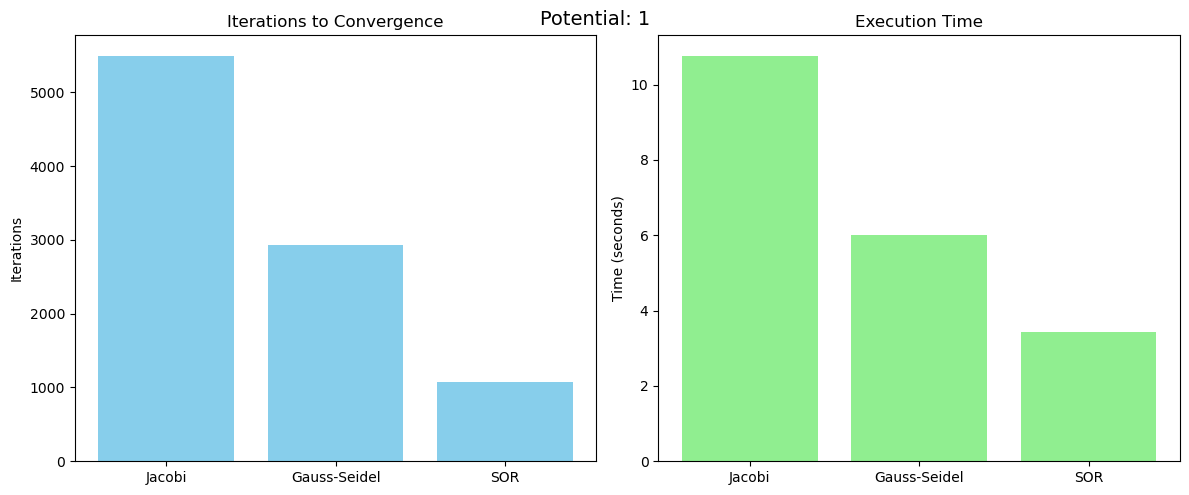

In [13]:
methods = ['Jacobi', 'Gauss-Seidel', 'SOR']
iterations = [j_iterations, g_iterations, s_iterations] 
execution_times = [j_time, g_time, s_time] 

plt.figure(figsize=(12, 5))
# Plotting iterations
plt.subplot(1, 2, 1)
plt.bar(methods, iterations, color='skyblue')
plt.title('Iterations to Convergence')
plt.ylabel('Iterations')

# Plotting execution time
plt.subplot(1, 2, 2)
plt.bar(methods, execution_times, color='lightgreen')
plt.title('Execution Time')
plt.ylabel('Time (seconds)')

plt.tight_layout()
fig = plt.gcf()
fig.suptitle('Potential: 1', fontsize=14) 
plt.show()


Now for when $V_0$ = 0 to $2\pi$

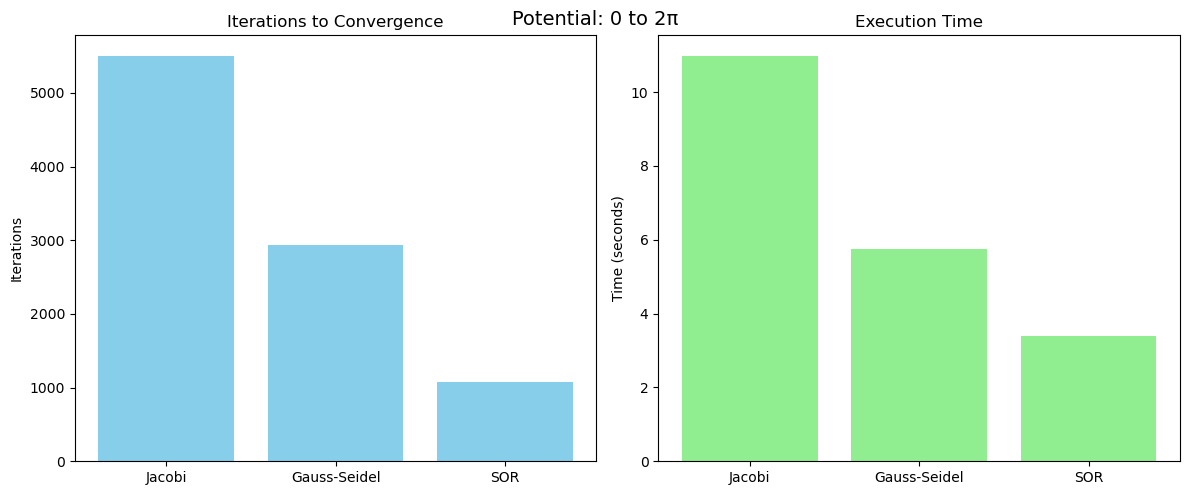

In [14]:
methods = ['Jacobi', 'Gauss-Seidel', 'SOR']
iterations = [j_iterations_1, g_iterations_1, s_iterations_1]  
execution_times = [j_time_1, g_time_1, s_time_1]

plt.figure(figsize=(12, 5))

# Plotting iterations
plt.subplot(1, 2, 1)
plt.bar(methods, iterations, color='skyblue')
plt.title('Iterations to Convergence')
plt.ylabel('Iterations')

# Plotting execution time
plt.subplot(1, 2, 2)
plt.bar(methods, execution_times, color='lightgreen')
plt.title('Execution Time')
plt.ylabel('Time (seconds)')

plt.tight_layout()
fig = plt.gcf()
fig.suptitle('Potential: 0 to 2π', fontsize=14) 
plt.show()


### Part 3.2: Observations

After presenting to my peers and instructors, it was suggested that I include a visualization that looks at all three methods at the same number of iterations to show how far they are in representing the electrostatic potential inside the pipe. So I decided to do just that. Below is the representation of the electrostatic potential within the pipe at 100 iterations for each method. This was done for when $V_0$ = 1 initially.

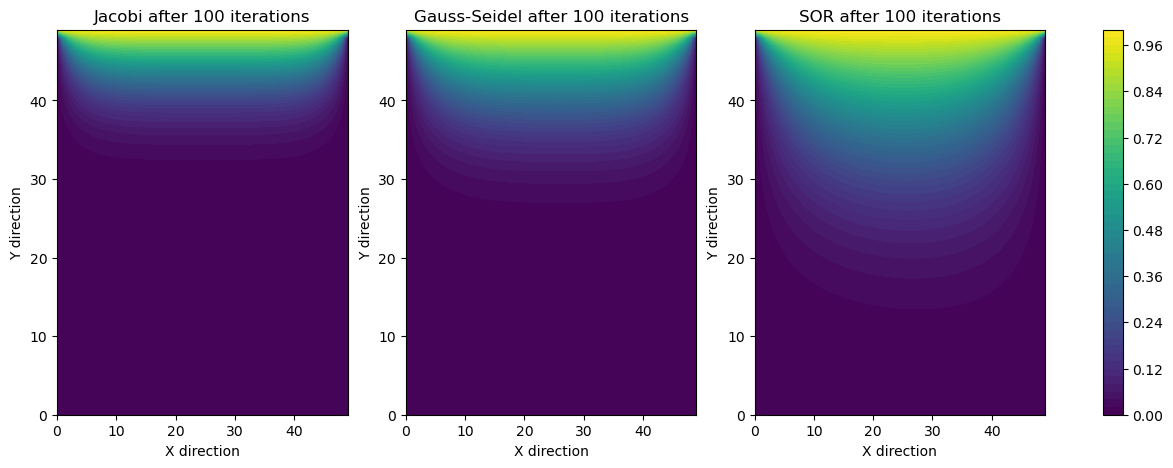

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def initialize_potential(Nx, Ny, V0):
    """
    Initialize the potential grid with boundary conditions for solving electrostatic problems.

    Parameters:
    - Nx (int): Number of grid points along the x-axis.
    - Ny (int): Number of grid points along the y-axis.
    - V0 (float): Potential value to apply at the top boundary.

    Returns:
    - np.ndarray: Initialized potential grid with boundary conditions set.
    """
    potential = np.zeros((Ny, Nx))
    potential[-1, :] = V0  # Set top boundary condition
    return potential

def run_method(method, potential, iterations, omega=None):
    """
    Run a specified numerical method for a fixed number of iterations.

    Parameters:
    - method (function): The numerical method to be run (jacobi_step, gauss_seidel_step, SOR_step).
    - potential (np.ndarray): Initial potential grid.
    - iterations (int): Number of iterations to run the method.
    - omega (float, optional): Relaxation factor used only for the SOR method.

    Returns:
    - np.ndarray: Potential grid after the specified number of iterations.
    """
    Ny, Nx = potential.shape
    for _ in range(iterations):
        if omega is not None:
            potential = method(potential, omega)
        else:
            potential = method(potential)
    return potential

def jacobi_step(potential):
    """
    Perform one iteration step of the Jacobi method.

    Parameters:
    - potential (np.ndarray): Current potential grid.

    Returns:
    - np.ndarray: Updated potential grid after one Jacobi iteration.
    """
    Ny, Nx = potential.shape
    new_potential = np.copy(potential)
    for i in range(1, Ny - 1):
        for j in range(1, Nx - 1):
            new_potential[i, j] = 0.25 * (potential[i+1, j] + potential[i-1, j] +
                                          potential[i, j+1] + potential[i, j-1])
    return new_potential

def gauss_seidel_step(potential):
    """
    Perform one iteration step of the Gauss-Seidel method.

    Parameters:
    - potential (np.ndarray): Current potential grid.

    Returns:
    - np.ndarray: Updated potential grid after one Gauss-Seidel iteration.
    """
    Ny, Nx = potential.shape
    for i in range(1, Ny - 1):
        for j in range(1, Nx - 1):
            potential[i, j] = 0.25 * (potential[i+1, j] + potential[i-1, j] +
                                      potential[i, j+1] + potential[i, j-1])
    return potential

def SOR_step(potential, omega):
    """
    Perform one iteration step of the Successive Overrelaxation (SOR) method.

    Parameters:
    - potential (np.ndarray): Current potential grid.
    - omega (float): Relaxation factor to enhance convergence speed.

    Returns:
    - np.ndarray: Updated potential grid after one SOR iteration.
    """
    Ny, Nx = potential.shape
    for i in range(1, Ny - 1):
        for j in range(1, Nx - 1):
            new_value = 0.25 * (potential[i+1, j] + potential[i-1, j] +
                                potential[i, j+1] + potential[i, j-1])
            potential[i, j] += omega * (new_value - potential[i, j])
    return potential

# Parameters
Nx, Ny = 50, 50
V0 = 1
iterations = 100  # Fixed number of iterations for comparison
omega = 1.5  # Relaxation factor for SOR

# Initialize potentials
potential_jacobi = initialize_potential(Nx, Ny, V0)
potential_gs = np.copy(potential_jacobi)
potential_sor = np.copy(potential_jacobi)

jacobi_potential = run_method(jacobi_step, potential_jacobi, iterations)
gs_potential = run_method(gauss_seidel_step, potential_gs, iterations)
sor_potential = run_method(SOR_step, potential_sor, iterations, omega)

# Plotting results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].contourf(jacobi_potential, 50, cmap='viridis')
axes[0].set_title('Jacobi after 100 iterations')
axes[0].set_xlabel('X direction')
axes[0].set_ylabel('Y direction')

axes[1].contourf(gs_potential, 50, cmap='viridis')
axes[1].set_title('Gauss-Seidel after 100 iterations')
axes[1].set_xlabel('X direction')
axes[1].set_ylabel('Y direction')

axes[2].contourf(sor_potential, 50, cmap='viridis')
axes[2].set_title('SOR after 100 iterations')
axes[2].set_xlabel('X direction')
axes[2].set_ylabel('Y direction')

fig.colorbar(axes[0].collections[0], ax=axes, orientation='vertical', fraction=0.1)
plt.show()

This is a clear representation on how the SOR method is more efficient as within just the first 100 iterations the plot is closer to showing the true electrostatic potential of the pipe in comparison to the other two methods. Now let's look at how the plots look for the $V_0$ = 0 to $2\pi$ at the same number of iterations.

The code remains the same as before, the only thing changing the is the $V_0$ definition.

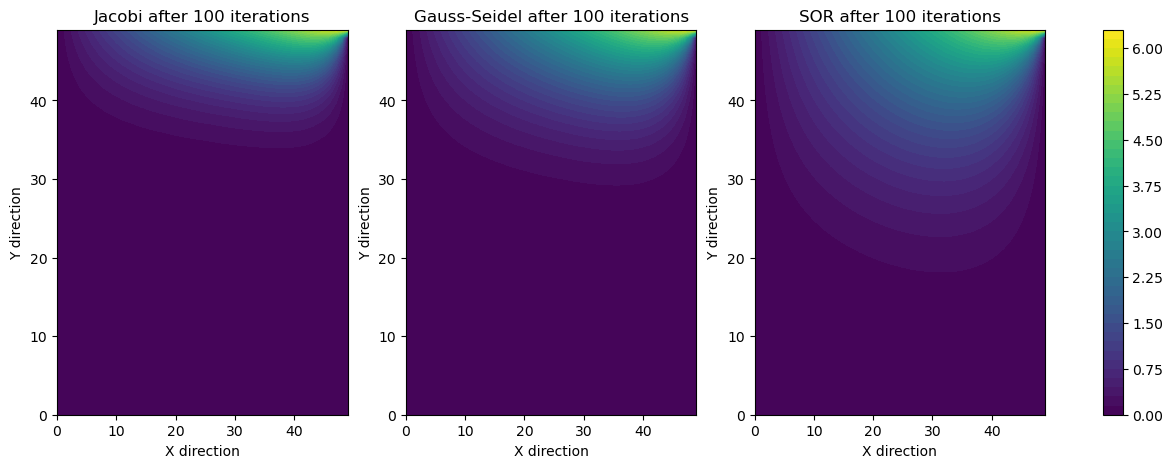

In [9]:
def initialize_potential(Nx, Ny, V0):
    """
    Initialize the potential grid with boundary conditions for solving electrostatic problems.

    Parameters:
    - Nx (int): Number of grid points along the x-axis.
    - Ny (int): Number of grid points along the y-axis.
    - V0 (float): Potential value to apply at the top boundary.

    Returns:
    - np.ndarray: Initialized potential grid with boundary conditions set.
    """
    potential = np.zeros((Ny, Nx))
    potential[-1, :] = V0  # Set top boundary condition
    return potential

def run_method(method, potential, iterations, omega=None):
    """
    Run a specified numerical method for a fixed number of iterations.

    Parameters:
    - method (function): The numerical method to be run (jacobi_step, gauss_seidel_step, SOR_step).
    - potential (np.ndarray): Initial potential grid.
    - iterations (int): Number of iterations to run the method.
    - omega (float, optional): Relaxation factor used only for the SOR method.

    Returns:
    - np.ndarray: Potential grid after the specified number of iterations.
    """
    Ny, Nx = potential.shape
    for _ in range(iterations):
        if omega is not None:
            potential = method(potential, omega)
        else:
            potential = method(potential)
    return potential

def jacobi_step(potential):
    """
    Perform one iteration step of the Jacobi method.

    Parameters:
    - potential (np.ndarray): Current potential grid.

    Returns:
    - np.ndarray: Updated potential grid after one Jacobi iteration.
    """
    Ny, Nx = potential.shape
    new_potential = np.copy(potential)
    for i in range(1, Ny - 1):
        for j in range(1, Nx - 1):
            new_potential[i, j] = 0.25 * (potential[i+1, j] + potential[i-1, j] +
                                          potential[i, j+1] + potential[i, j-1])
    return new_potential

def gauss_seidel_step(potential):
    """
    Perform one iteration step of the Gauss-Seidel method.

    Parameters:
    - potential (np.ndarray): Current potential grid.

    Returns:
    - np.ndarray: Updated potential grid after one Gauss-Seidel iteration.
    """
    Ny, Nx = potential.shape
    for i in range(1, Ny - 1):
        for j in range(1, Nx - 1):
            potential[i, j] = 0.25 * (potential[i+1, j] + potential[i-1, j] +
                                      potential[i, j+1] + potential[i, j-1])
    return potential

def SOR_step(potential, omega):
    """
    Perform one iteration step of the Successive Overrelaxation (SOR) method.

    Parameters:
    - potential (np.ndarray): Current potential grid.
    - omega (float): Relaxation factor to enhance convergence speed.

    Returns:
    - np.ndarray: Updated potential grid after one SOR iteration.
    """
    Ny, Nx = potential.shape
    for i in range(1, Ny - 1):
        for j in range(1, Nx - 1):
            new_value = 0.25 * (potential[i+1, j] + potential[i-1, j] +
                                potential[i, j+1] + potential[i, j-1])
            potential[i, j] += omega * (new_value - potential[i, j])
    return potential

# Parameters
Nx, Ny = 50, 50
V0 = np.linspace(0,2*np.pi)
iterations = 100  # Fixed number of iterations for comparison
omega = 1.5  # Relaxation factor for SOR

# Initialize potentials
potential_jacobi = initialize_potential(Nx, Ny, V0)
potential_gs = np.copy(potential_jacobi)
potential_sor = np.copy(potential_jacobi)

jacobi_potential = run_method(jacobi_step, potential_jacobi, iterations)
gs_potential = run_method(gauss_seidel_step, potential_gs, iterations)
sor_potential = run_method(SOR_step, potential_sor, iterations, omega)

# Plotting results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].contourf(jacobi_potential, 50, cmap='viridis')
axes[0].set_title('Jacobi after 100 iterations')
axes[0].set_xlabel('X direction')
axes[0].set_ylabel('Y direction')

axes[1].contourf(gs_potential, 50, cmap='viridis')
axes[1].set_title('Gauss-Seidel after 100 iterations')
axes[1].set_xlabel('X direction')
axes[1].set_ylabel('Y direction')

axes[2].contourf(sor_potential, 50, cmap='viridis')
axes[2].set_title('SOR after 100 iterations')
axes[2].set_xlabel('X direction')
axes[2].set_ylabel('Y direction')

fig.colorbar(axes[0].collections[0], ax=axes, orientation='vertical', fraction=0.1)
plt.show()

Once again there is further progress when it comes to the development of the electrostatic potential graph with the SOR method compared to the other two. This can clearly be seen from the representation above.

## Part 4: Conclusion and Perspectives

### Part 4.1: Results/Obstacles

It is evidently clear that the SOR method is the more efficient in calculating the electrostatic potential as it takes the least number of iterations and the smallest amount of time to converge. This is true for this specific problem and based on the specific relaxation factor that was used, however, this might not be true for all problems as it is based on the problem being looked at.

The main obstacle I ran into was to find the topic I wanted to explore. I first wanted to look at how changing the boundary conditions of the rectangular pipe would affect the electrostatic potential but by using only one method. I found that this doesn't really give me a quantitative result or helped me explore/expand on the idea of calculating the electrstatic potential withtin an object. I was able to consult with the professor and my peers and found it to be more fitting to test different numerical methods and how long it takes them to converge. Another obstacle that I ran into was figuring out which methods I wanted to use. I was going to use variously different numerical methods that we learned in class, but then I figured it would be a better analysis to show how the different ways of updating the potential can drastically change the execution time and the number of iterations taken to converge. This led me to choose the Jacobi, Gauss-Seidel, and SOR method as they build off each other, each being a better version of the last. The last obstacle I ran into was not getting the same output for all three methods. Initally I wasn't updating my Gauss-Seidel method correctly giving me a different output when visualizing the electrostatic potential but after finding my error, I got my desired output.

### Part 4.2: Next Time/Overall Answer

If I was given another chance at doing this project again, I would try to find the optimal relaxation factor for the SOR method and see how the optimal value vs other values would change the convergance rate. I think that would be an interesting extension to the project, just so every method is optimized. I would also see how changing more than one boundry would affect the efficiency of each method. For time and simplicity sake, I only changed one boundary instead of multiple, but I am curious as to what would happen if more than one boundary was altered. This could either be having constant boundaries or varying boundaries. Lastly, I would also change the geometry of the object I am looking at and see how that alters the execution time and number of iterations for each method. This way we can see if one method might be more efficient for one object but not as efficient for another object.


The question that are being addressed in this exploration is:

    Which numerical analyis method is the most effective in terms on exectution time and number of iterations?

As mentioned multiple of time the Successive Over-relaxation method has been the most effective in terms of executiont time and number of iterations. In the analysis done, the Jacobi method has taken around 5 times as many iterations as the SOR method and about 2 times the iterations taken by the Gauss-Seidel method. The execution time has also been 3 times the execution time of the SOR method and 2 times the execution time of the Gauss-Seidel method. This pattern can be seen with both a constant and varying potential. Overall for this specific problem it is obvious which method is the most efficient and this follows what is expressed in reading and research done on the three methods.

## Bibliography:

[1]Successive Over-Relaxation, https://en.wikipedia.org/wiki/Successive_over-relaxation#:~:text=In%20numerical%20linear%20algebra%2C%20the.

[2]Iterative Methods for Solving Ax = B - the SOR Method | Mathematical Association of America, https://maa.org/press/periodicals/loci/joma/iterative-methods-for-solving-iaxi-ibi-the-sor-method.

[3]E. W. Weisstein, Successive Overrelaxation Method, https://mathworld.wolfram.com/SuccessiveOverrelaxationMethod.html.

[4]Electrostatic Potential by the Relaxation Method, n.d.

[5]Successive Over-Relaxation Method — ESE Jupyter Material, https://primer-computational-mathematics.github.io/book/c_mathematics/numerical_methods/6_Solving_PDEs_SOR.html.

[6]Python Measure the Execution Time of a Program, https://pynative.com/python-get-execution-time-of-program/.

[7]7.3 the Jacobi and Gauss-Seidel Iterative Methods the Jacobi Method, n.d.

[8]C. Karpfinger, Iterative Methods for Systems of Linear Equations, Springer EBooks 779 (2022).

[9]M. Saha and J. Chakravarty, Convergence of Generalized SOR, Jacobi and Gauss–Seidel Methods for Linear Systems, International Journal of Applied and Computational Mathematics 6, (2020).

[10]D'Aprano, S. (2022). "Syntactic Sugar for 'is not None'" [Source code]. Retrieved from https://discuss.python.org/t/syntactic-sugar-for-is-not-none/16242/2

[11]Lin, H., & Doddamreddy, D. (2024). "Homework 2: Matrices, Linear Algebra, and Eigenvalue Problems" [Jupyter Notebook].

[12]Lin, H., & Doddamreddy, D. (2024). "Day 06 In-Class Assignment: LU Decomposition and Jacobi Iterative Method" [Jupyter Notebook].
